# LSTM's Long Distance Memory

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
!nvidia-smi -L
print(f'Tensorflow version: {tf.__version__}')

GPU 0: GeForce RTX 2080 Ti (UUID: GPU-3cb47403-efa9-71ae-1700-c27de6cb0d0a)
Tensorflow version: 2.3.1


In [3]:
def get_label(x, i1, i2, i3):
    if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
        return 1
    if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
        return 1
    return 0


N = 5000
T = 30
D = 1
X = []
y = []
for _ in range(N):
    x = np.random.randn(T)
    X.append(x)
    y.append(get_label(x, 0, 1, 2))
X = np.asarray(X).reshape(-1, T, D)
y = np.asarray(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

Epoch 1/100
105/105 [==============================] - 1s 6ms/step - loss: 0.6956 - accuracy: 0.5027 - val_loss: 0.6950 - val_accuracy: 0.4770
Epoch 2/100
105/105 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.5164 - val_loss: 0.6934 - val_accuracy: 0.4958
Epoch 3/100
105/105 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5119 - val_loss: 0.6926 - val_accuracy: 0.5139
Epoch 4/100
105/105 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5164 - val_loss: 0.6935 - val_accuracy: 0.4909
Epoch 5/100
105/105 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.5227 - val_loss: 0.6914 - val_accuracy: 0.5242
Epoch 6/100
105/105 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.5236 - val_loss: 0.6910 - val_accuracy: 0.5206
Epoch 7/100
105/105 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.5454 - val_loss: 0.6905 - val_accuracy: 0.5327

Epoch 58/100
105/105 [==============================] - 0s 3ms/step - loss: 0.0141 - accuracy: 0.9949 - val_loss: 0.0243 - val_accuracy: 0.9915
Epoch 59/100
105/105 [==============================] - 0s 3ms/step - loss: 0.0205 - accuracy: 0.9946 - val_loss: 0.0146 - val_accuracy: 0.9952
Epoch 60/100
105/105 [==============================] - 0s 3ms/step - loss: 0.0165 - accuracy: 0.9934 - val_loss: 0.0191 - val_accuracy: 0.9927
Epoch 61/100
105/105 [==============================] - 0s 4ms/step - loss: 0.0217 - accuracy: 0.9916 - val_loss: 0.0219 - val_accuracy: 0.9903
Epoch 62/100
105/105 [==============================] - 0s 3ms/step - loss: 0.0122 - accuracy: 0.9949 - val_loss: 0.0199 - val_accuracy: 0.9909
Epoch 63/100
105/105 [==============================] - 0s 3ms/step - loss: 0.0194 - accuracy: 0.9922 - val_loss: 0.0189 - val_accuracy: 0.9939
Epoch 64/100
105/105 [==============================] - 0s 3ms/step - loss: 0.0188 - accuracy: 0.9940 - val_loss: 0.0340 - val_accuracy:

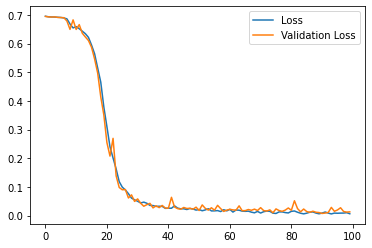

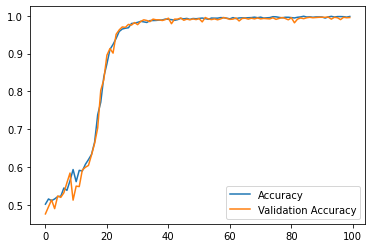

52/52 [==============================] - 0s 1ms/step - loss: 0.0130 - accuracy: 0.9952
Accuracy: 0.9951515197753906


In [4]:
i = tf.keras.layers.Input(shape=(T, D))
x = tf.keras.layers.LSTM(5, return_sequences=True)(i)
x = tf.keras.layers.GlobalMaxPool1D()(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.models.Model(i, x)

model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

r = model.fit(X_train, y_train,
              validation_data=(X_test, y_test),
              epochs=100)

plt.plot(r.history.get('loss'), label='Loss')
plt.plot(r.history.get('val_loss'), label='Validation Loss')
plt.legend()
plt.show()

plt.plot(r.history.get('accuracy'), label='Accuracy')
plt.plot(r.history.get('val_accuracy'), label='Validation Accuracy')
plt.legend()
plt.show()

print(f'Accuracy: {model.evaluate(X_test, y_test)[1]}')